# K Means Implementation

In [18]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## K Means Algorithm

In [19]:
def distance(v1, v2):
    return np.sqrt(np.sum((v1 - v2)**2))

def initialize_clusters(X, k):
    np.random.seed(42)
    random_indices = np.random.choice(X.shape[0], k, replace=False)
    centers = X[random_indices].copy()
    
    clusters = {}
    for i in range(k):
        clusters[i] = {
            'center': centers[i],
            'points': []
        }
    return clusters

def run_kmeans(X, k=10, max_iters=100):
    clusters = initialize_clusters(X, k)
    assignments = np.zeros(X.shape[0], dtype=int)

    for _ in range(max_iters):
        for cid in clusters:
            clusters[cid]['points'] = []
        for ix in range(X.shape[0]):
            point = X[ix]
            dist_list = [distance(point, clusters[cid]['center']) for cid in clusters]
            current_cluster = np.argmin(dist_list)
            clusters[current_cluster]['points'].append(ix)
            assignments[ix] = current_cluster
        
        converged = True
        for cid in clusters:
            pts_idx = clusters[cid]['points']
            if len(pts_idx) > 0:
                pts = X[pts_idx]
                new_center = pts.mean(axis=0)
                if not np.allclose(clusters[cid]['center'], new_center):
                    converged = False
                clusters[cid]['center'] = new_center
                
        if converged:
            print(f"K-Means converged after {_+1} iterations for k={k}.")
            break
    
    centers = np.array([clusters[cid]['center'] for cid in range(k)])
    return assignments, centers

## Functions to calculate WCSS, Silhouette Scores

### WCSS calculation

In [20]:
def compute_wcss(X, assignments, centers):
    wcss = 0.0
    for i in range(X.shape[0]):
        c = assignments[i]
        wcss += np.sum((X[i] - centers[c])**2)
    return wcss

### Silhouette Score Calculation

In [21]:
def compute_silhouette_score(X, assignments, centers):
    k = centers.shape[0]
    cluster_points = {}
    for c in range(k):
        cluster_points[c] = []
    for i, c in enumerate(assignments):
        cluster_points[c].append(i)
    
    for c in cluster_points:
        cluster_points[c] = np.array(cluster_points[c])
    
    s_values = []
    for i in range(X.shape[0]):
        c = assignments[i]
        same_cluster_idx = cluster_points[c]
        if len(same_cluster_idx) > 1:
            same_points = same_cluster_idx[same_cluster_idx != i]
            a_i = np.mean([distance(X[i], X[j]) for j in same_points]) if len(same_points) > 0 else 0.0
        else:
            a_i = 0.0

        other_clusters = [cx for cx in range(k) if cx != c]
        b_i_candidates = []
        for oc in other_clusters:
            oc_points = cluster_points[oc]
            if len(oc_points) > 0:
                dist_list = [distance(X[i], X[j]) for j in oc_points]
                b_i_candidates.append(np.mean(dist_list))
        b_i = min(b_i_candidates) if b_i_candidates else 0.0
       
        if a_i == 0 and b_i == 0:
            s = 0.0
        else:
            s = (b_i - a_i) / max(a_i, b_i)
        s_values.append(s)
    return np.mean(s_values)

## Loading and scaling datasets

In [22]:
train_data = pd.read_csv('data/fashion-mnist_train.csv')
train_labels = train_data['label'].values
train_data = train_data.drop('label', axis=1)
X_train = (train_data/255)*9+1
X_train = X_train.values

test_data = pd.read_csv('data/fashion-mnist_test.csv')
test_labels = test_data['label'].values
test_data = test_data.drop('label', axis=1)
X_test = (test_data / 255) * 9 + 1
X_test = X_test.values

## Plotting Elbow Curve and Silhouette Scores

### Elbow Curve Plot

K-Means converged after 2 iterations for k=1.
K-Means converged after 33 iterations for k=2.
K-Means converged after 68 iterations for k=3.
K-Means converged after 28 iterations for k=4.
K-Means converged after 21 iterations for k=5.
K-Means converged after 60 iterations for k=6.
K-Means converged after 24 iterations for k=7.
K-Means converged after 25 iterations for k=8.
K-Means converged after 31 iterations for k=9.
K-Means converged after 55 iterations for k=10.


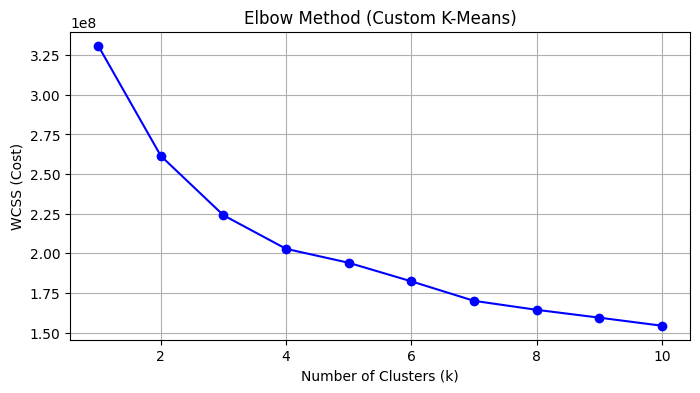

In [11]:
maxK = 10
kArr = []
costArr = []
for k in range(1, maxK+1):
    assignments, centers = run_kmeans(X_train, k=k, max_iters=300)
    cost = compute_wcss(X_train, assignments, centers)
    kArr.append(k)
    costArr.append(cost)

plt.figure(figsize=(8,4))
plt.plot(kArr, costArr, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Cost)')
plt.title('Elbow Method (Custom K-Means)')
plt.grid(True)
plt.show()


### Silhouette Scores Plot

In [12]:
maxK = 10
sKArr = []
silhouetteScores = []
for k in range(1, maxK+1):
    assignments, centers = run_kmeans(X_train, k=k, max_iters=300)
    s = compute_silhouette_score(X_train, assignments, centers)
    sKArr.append(k)
    silhouetteScores.append(s)

plt.figure(figsize=(8,4))
plt.plot(sKArr, silhouetteScores, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis (Custom K-Means)')
plt.grid(True)
plt.show()

K-Means converged after 2 iterations for k=1.


KeyboardInterrupt: 

## Choosing K value and implementing K Means 

In [23]:
chosen_k=10 

cluster_labels_train, cluster_centers = run_kmeans(X_train, k=chosen_k, max_iters=300)

K-Means converged after 55 iterations for k=10.


## Plotting the distribution of various labels in each cluster and finding the majority label

### Assigning Class Label Names

In [25]:
class_labels = {
    0:'T-shirt/top',
    1:'Trouser',
    2:'Pullover',
    3:'Dress',
    4:'Coat',
    5:'Sandal',
    6:'Shirt',
    7:'Sneaker',
    8:'Bag',
    9:'Ankle boot'
}

### Plotting distribution graphs of all clusters

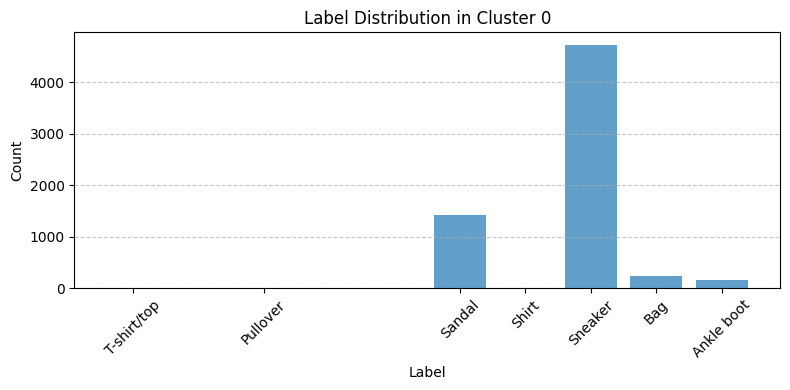

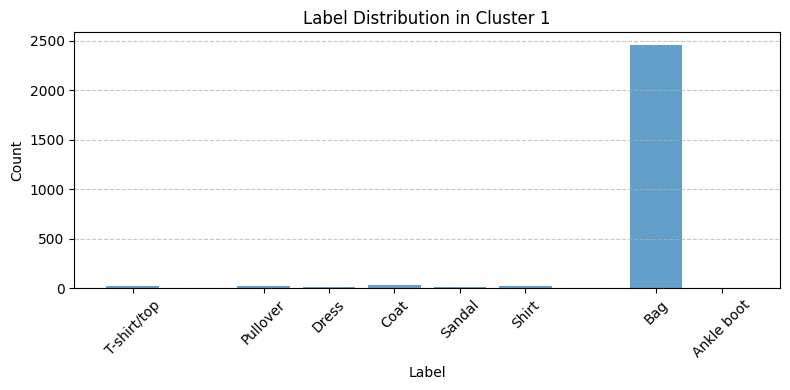

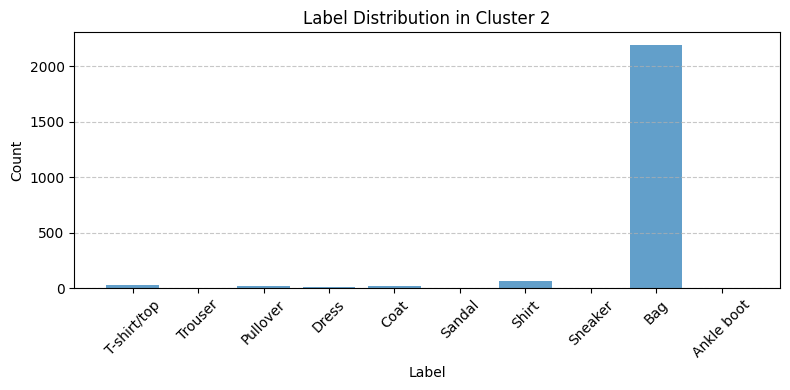

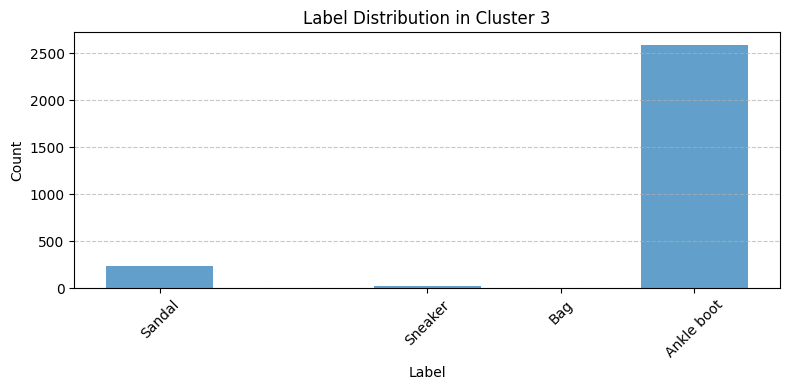

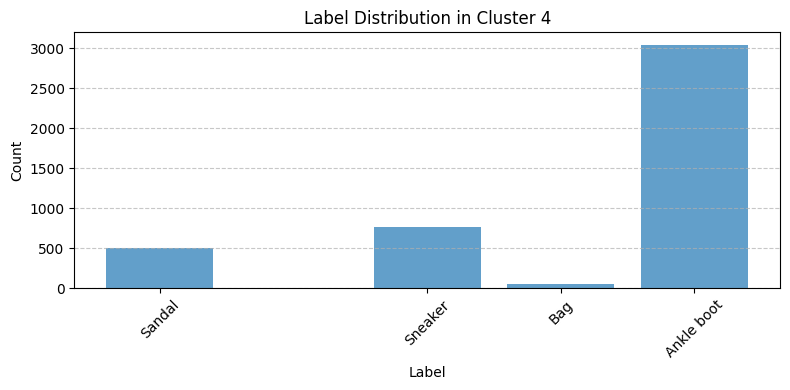

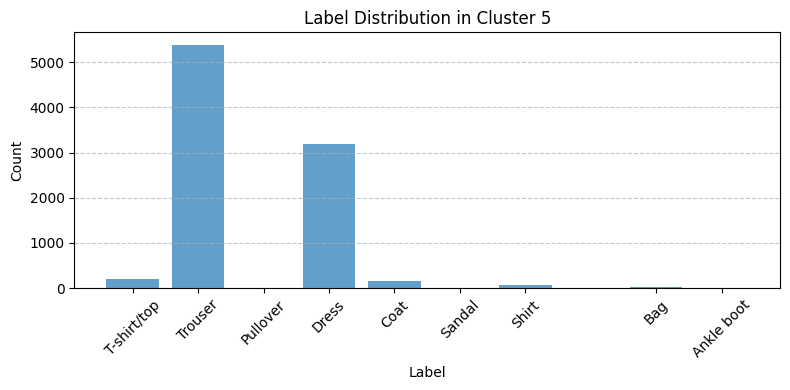

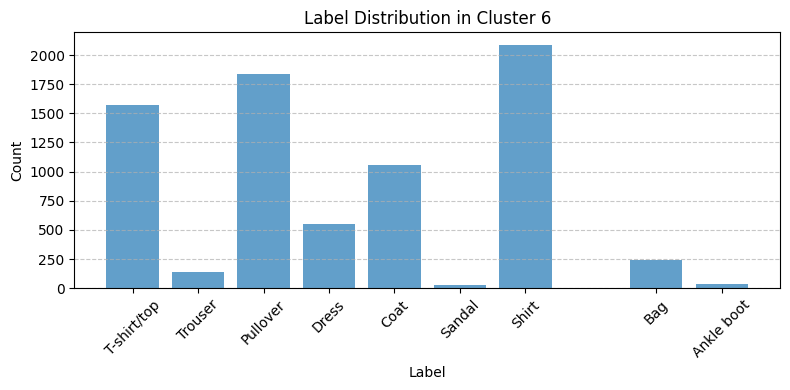

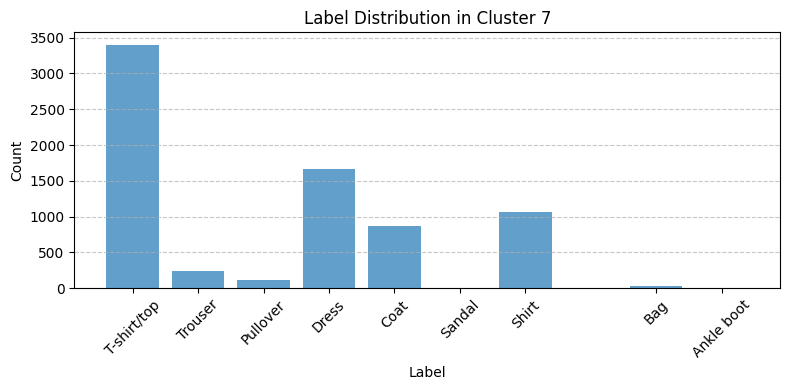

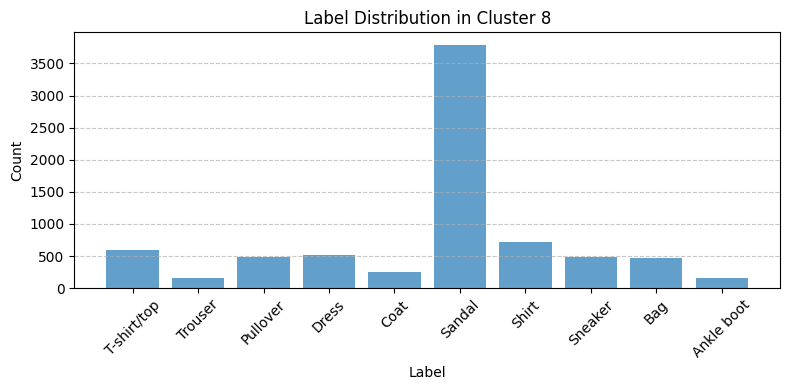

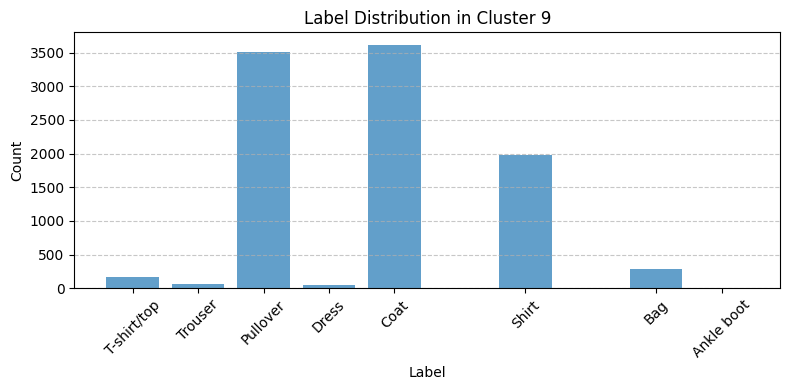

In [26]:
cluster_to_label = {}
for cluster_id in range(chosen_k):
    cluster_item_labels = train_labels[cluster_labels_train == cluster_id]
    unique_labels, counts = np.unique(cluster_item_labels, return_counts=True)

    most_common_label = unique_labels[np.argmax(counts)]
    cluster_to_label[cluster_id] = most_common_label

    plt.figure(figsize=(8,4))
    plt.bar(unique_labels, counts, align='center', alpha=0.7)
    plt.xlabel("Label")
    plt.ylabel("Count")
    plt.title(f"Label Distribution in Cluster {cluster_id}")
    plt.xticks(unique_labels, [class_labels[l] for l in unique_labels], rotation=45)
    plt.grid(True, axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

### Finding majority label in each cluster

In [27]:
print("\nCluster to Label Mapping (Majority Vote):")
for c in range(chosen_k):
    print(f"Cluster {c} -> Label {cluster_to_label[c]} ({class_labels[cluster_to_label[c]]})")


Cluster to Label Mapping (Majority Vote):
Cluster 0 -> Label 7 (Sneaker)
Cluster 1 -> Label 8 (Bag)
Cluster 2 -> Label 8 (Bag)
Cluster 3 -> Label 9 (Ankle boot)
Cluster 4 -> Label 9 (Ankle boot)
Cluster 5 -> Label 1 (Trouser)
Cluster 6 -> Label 6 (Shirt)
Cluster 7 -> Label 0 (T-shirt/top)
Cluster 8 -> Label 5 (Sandal)
Cluster 9 -> Label 4 (Coat)


## Evaluating with Test Dataset and finding accuracy

In [28]:
test_assignments = []
for i in range(X_test.shape[0]):
    point = X_test[i]
    dists = np.sqrt(np.sum((point - cluster_centers)**2, axis=1))
    test_cluster = np.argmin(dists)
    test_assignments.append(test_cluster)

predicted_labels = np.array([cluster_to_label[cid] for cid in test_assignments])

accuracy = np.mean(predicted_labels == test_labels)
print(f"\nTest Accuracy with Custom K-Means: {accuracy * 100:.2f}%")


Test Accuracy with Custom K-Means: 55.24%
